<a href="https://colab.research.google.com/github/ngohuy1811/AIO---Module-2/blob/main/Image_depth_estimation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Pixel-wise matching**

In [ ]:
!gdown --id 14gf8bcym_lTcvjZQmg8kwq3aXkENBxMQ
!unzip tsukuba.zip -d tsukuba

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=14gf8bcym_lTcvjZQmg8kwq3aXkENBxMQ
To: /content/tsukuba.zip
100% 354k/354k [00:00<00:00, 140MB/s]
Archive:  tsukuba.zip
mapname:  conversion of  failed
 extracting: tsukuba/left.png        
 extracting: tsukuba/right.png       
 extracting: tsukuba/groundtruth.png  


# **PROBLEM 1**
PIXEL WISE MATCHING

In [ ]:

# define cost functions
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

def l1_distance(x,y):
  return abs(x-y)

def l2_distance(x,y):
  return (x-y)**2

left_image_path = '/content/tsukuba/left.png'
right_image_path = '/content/tsukuba/right.png'



In [ ]:
#read left, right images then convert to grayscale
left = cv2.imread(left_image_path, 0)
right = cv2.imread(right_image_path, 0)

left = left.astype(np.float32)
right = right.astype(np.float32)

height, width = left.shape[:2]

# Create blank disparity map
#trong openCV shape cua 1 array co dang x(h,w)
depth = np.zeros((height, width), dtype = np.uint8)


In [ ]:
scale = 16
max_value = 255
disparity_range = 16

for y in range(height):
  for x in range(width):
    #find d where cost has minimum value
    disparity = 0
    cost_min = max_value

    for d in range(disparity_range):
      cost = max_value if (x-d) < 0\
                      else l1_distance(int(left[y,x]), int(right[y,x-d]))

      if cost < cost_min:
        cost_min = cost
        disparity = d

    depth[y,x] = disparity * scale

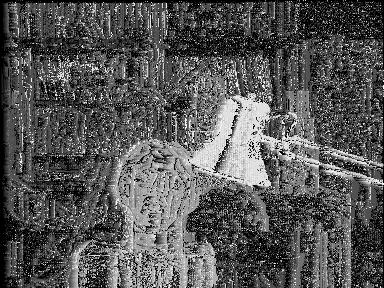

In [ ]:
cv2_imshow(depth)

# **PROBLEM 2**
WINDOW-BASED MATCHING

In [ ]:
!gdown --id 1wxmiUdqMciuTOs0ouKEISl8-iTVXdOWn
!unzip Aloe_images.zip -d aloe

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1wxmiUdqMciuTOs0ouKEISl8-iTVXdOWn
To: /content/Aloe_images.zip
100% 1.32M/1.32M [00:00<00:00, 97.8MB/s]
Archive:  Aloe_images.zip
  inflating: aloe/Aloe/Aloe_left_1.png  
  inflating: aloe/Aloe/Aloe_right_3.png  
  inflating: aloe/Aloe/Aloe_right_1.png  
  inflating: aloe/Aloe/Aloe_right_2.png  
  inflating: aloe/Aloe/Disparity_map_corr.png  


In [ ]:

# define cost functions
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

def l1_distance(x,y):
  return abs(x-y)

def l2_distance(x,y):
  return (x-y)**2


In [ ]:
def window_based_matching_l1( left_image_path , right_image_path , disparity_range , kernel_size , save_result = True ):
  #read left, right images then convert to grayscale
  left = cv2.imread(left_image_path, 0)
  right = cv2.imread(right_image_path, 0)

  left = left.astype(np.float32)
  right = right.astype(np.float32)

  height, width = left.shape[:2]

  # Create blank disparity map
  #trong openCV shape cua 1 array co dang x(h,w)
  depth = np.zeros((height, width), dtype = np.uint8)

  kernel_half = int((kernel_size - 1)/2)
  scale = 3
  max_value = 255 * 9

  for y in range(kernel_half, height - kernel_half):
    for x in range(kernel_half, width - kernel_half):
    #find d where cost has minimum value
      disparity = 0
      cost_min = 65534

      for d in range(disparity_range):
        total = 0
        value = 0

        for v in range (-kernel_half, kernel_half + 1):
            for u in range (-kernel_half, kernel_half +1):
              value = max_value
              if (x+u-d) >= 0:
                  value = l1_distance(int(left[y+v,x+u]), int(right[y+v,(x+u)-d]))

              total += value
        if total < cost_min:
          cost_min = total
          disparity = d

      depth[y,x] = disparity * scale

  if save_result == True :
    print ('Saving result ... ')
   # Save results
    cv2.imwrite(f'window_based_l1.png', depth )
    cv2.imwrite(f'window_based_l1_color.png', cv2.applyColorMap(depth,cv2.COLORMAP_JET))

  print ('Done .' )
  return depth

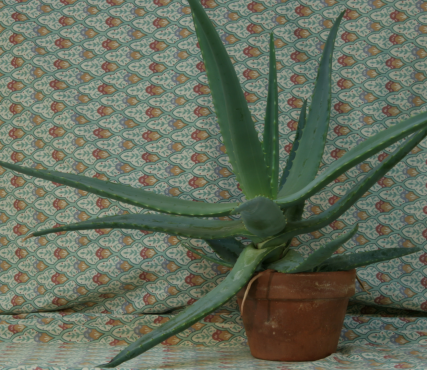

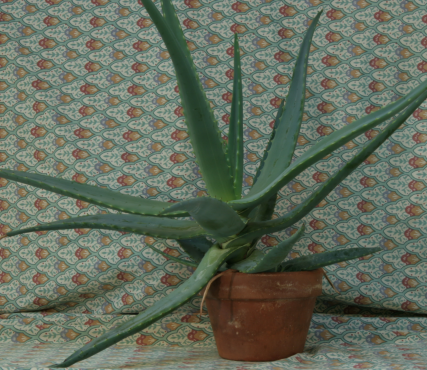

In [ ]:
left_img_path = '/content/aloe/Aloe/Aloe_left_1.png'
right_img_path = '/content/aloe/Aloe/Aloe_right_1.png'
disparity_range = 64
kernel_size = 3

left = cv2.imread(left_img_path)
right = cv2.imread(right_img_path)

cv2_imshow(left)
cv2_imshow(right)

Saving result ... 
Done .


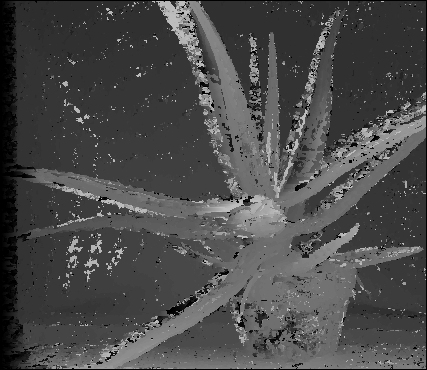

In [ ]:
disparity_range = 64
kernel_size = 3
depth = window_based_matching_l1(
    left_img_path,
    right_img_path,
    disparity_range,
    kernel_size=kernel_size,
    save_result=True
)

cv2_imshow(depth)

In [ ]:
def window_based_matching_l2( left_image_path , right_image_path , disparity_range , kernel_size , save_result = True ):
  #read left, right images then convert to grayscale
  left = cv2.imread(left_image_path, 0)
  right = cv2.imread(right_image_path, 0)

  left = left.astype(np.float32)
  right = right.astype(np.float32)

  height, width = left.shape[:2]

  # Create blank disparity map
  #trong openCV shape cua 1 array co dang x(h,w)
  depth = np.zeros((height, width), dtype = np.uint8)

  kernel_half = int((kernel_size - 1)/2)
  scale = 3
  max_value = 255 * 9

  for y in range(kernel_half, height - kernel_half):
    for x in range(kernel_half, width - kernel_half):
    #find d where cost has minimum value
      disparity = 0
      cost_min = 65534

      for d in range(disparity_range):
        total = 0
        value = 0

        for v in range (-kernel_half, kernel_half + 1):
            for u in range (-kernel_half, kernel_half +1):
              value = max_value
              if (x+u-d) >= 0:
                  value = l2_distance(int(left[y+v,x+u]), int(right[y+v,(x+u)-d]))

              total += value
        if total < cost_min:
          cost_min = total
          disparity = d

      depth[y,x] = disparity * scale

  if save_result == True :
    print ('Saving result ... ')
   # Save results
    cv2.imwrite(f'window_based_l1.png', depth )
    cv2.imwrite(f'window_based_l1_color.png', cv2.applyColorMap(depth,cv2.COLORMAP_JET))

  print ('Done .' )
  return depth

Saving result ... 
Done .


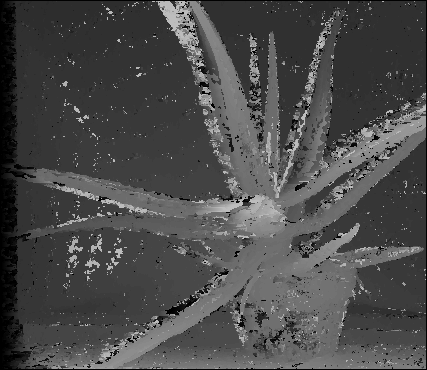

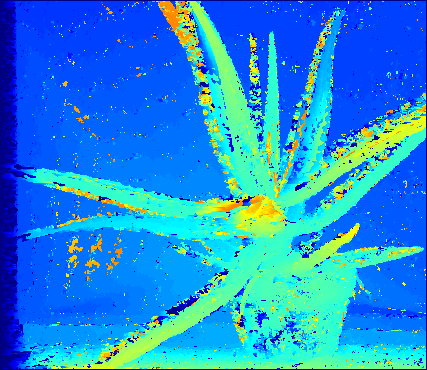

In [ ]:
disparity_range = 64
kernel_size = 3
depth = window_based_matching_l2(
    left_img_path,
    right_img_path,
    disparity_range,
    kernel_size=kernel_size,
    save_result=True
)

cv2_imshow(depth)
cv2_imshow(cv2.applyColorMap(depth,cv2.COLORMAP_JET))

# **PROBLEM 3**

In [ ]:
!gdown --id 1wxmiUdqMciuTOs0ouKEISl8-iTVXdOWn
!unzip Aloe_images.zip -d aloe

In [ ]:
# define cost functions
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

def l1_distance(x,y):
  return abs(x-y)

def l2_distance(x,y):
  return (x-y)**2

left_img_path = '/content/aloe/Aloe/Aloe_left_1.png'
right_img_path = '/content/aloe/Aloe/Aloe_right_2.png'


In [ ]:
def window_based_matching_l1( left_image_path , right_image_path , disparity_range , kernel_size , save_result = True ):
  #read left, right images then convert to grayscale
  left = cv2.imread(left_image_path, 0)
  right = cv2.imread(right_image_path, 0)

  left = left.astype(np.float32)
  right = right.astype(np.float32)

  height, width = left.shape[:2]

  # Create blank disparity map
  #trong openCV shape cua 1 array co dang x(h,w)
  depth = np.zeros((height, width), dtype = np.uint8)

  kernel_half = int((kernel_size - 1)/2)
  scale = 3
  max_value = 255 * 9

  for y in range(kernel_half, height - kernel_half):
    for x in range(kernel_half, width - kernel_half):
    #find d where cost has minimum value
      disparity = 0
      cost_min = 65534

      for d in range(disparity_range):
        total = 0
        value = 0

        for v in range (-kernel_half, kernel_half + 1):
            for u in range (-kernel_half, kernel_half +1):
              value = max_value
              if (x+u-d) >= 0:
                  value = l1_distance(int(left[y+v,x+u]), int(right[y+v,(x+u)-d]))

              total += value
        if total < cost_min:
          cost_min = total
          disparity = d

      depth[y,x] = disparity * scale

  if save_result == True :
    print ('Saving result ... ')
   # Save results
    cv2.imwrite(f'window_based_l1.png', depth )
    cv2.imwrite(f'window_based_l1_color.png', cv2.applyColorMap(depth,cv2.COLORMAP_JET))

  print ('Done .' )
  return depth

Saving result ... 
Done .


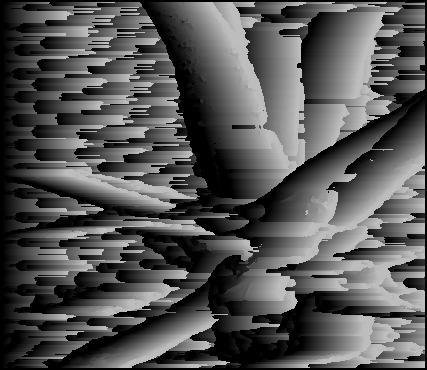

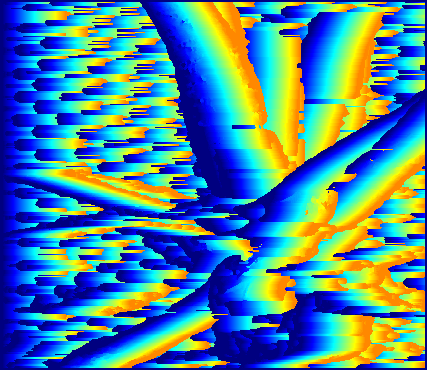

In [ ]:
disparity_range = 64
kernel_size = 5
depth = window_based_matching_l1(
    left_img_path,
    right_img_path,
    disparity_range,
    kernel_size=kernel_size,
    save_result=True
)

cv2_imshow(depth)
cv2_imshow(cv2.applyColorMap(depth,cv2.COLORMAP_JET))

Do độ đo L1 và L2 nhạy cảm với sự biên đổi của giá trị nên sẽ không thể hoạt động tốt với các ảnh khác độ sáng

# **Problem 4**

In [ ]:
!gdown --id 1wxmiUdqMciuTOs0ouKEISl8-iTVXdOWn
!unzip Aloe_images.zip -d aloe

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1wxmiUdqMciuTOs0ouKEISl8-iTVXdOWn
To: /content/Aloe_images.zip
100% 1.32M/1.32M [00:00<00:00, 9.11MB/s]
Archive:  Aloe_images.zip
  inflating: aloe/Aloe/Aloe_left_1.png  
  inflating: aloe/Aloe/Aloe_right_3.png  
  inflating: aloe/Aloe/Aloe_right_1.png  
  inflating: aloe/Aloe/Aloe_right_2.png  
  inflating: aloe/Aloe/Disparity_map_corr.png  


In [ ]:
# define cost functions
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

def l1_distance(x,y):
  return abs(x-y)

def l2_distance(x,y):
  return (x-y)**2

def cosine_similarity(x,y):
  return np.dot(x,y)/(np.linalg.norm(x)*np.linalg.norm(y))

left_img_path = '/content/aloe/Aloe/Aloe_left_1.png'
right_img_path = '/content/aloe/Aloe/Aloe_right_2.png'


In [ ]:
def window_based_matching_l1( left_image_path , right_image_path , disparity_range , kernel_size , save_result = True ):
  #read left, right images then convert to grayscale
  left = cv2.imread(left_image_path, 0)
  right = cv2.imread(right_image_path, 0)

  left = left.astype(np.float32)
  right = right.astype(np.float32)

  height, width = left.shape[:2]

  # Create blank disparity map
  #trong openCV shape cua 1 array co dang x(h,w)
  depth = np.zeros((height, width), dtype = np.uint8)

  kernel_half = int((kernel_size - 1)/2)
  scale = 3
  max_value = 255 * 9

  for y in range(kernel_half, height - kernel_half):
    for x in range(kernel_half, width - kernel_half):
    #find d where cost has minimum value
      disparity = 0
      cost_optimal = -1

      for j in range(disparity_range):
        d = x - j
        cost = -1
        if (d - kernel_half) > 0:
          wp = left [(y- kernel_half ) :(y+ kernel_half ) +1 , (x-kernel_half ) :(x+ kernel_half ) +1]
          wqd = right [(y- kernel_half ) :(y+ kernel_half ) +1 , (d-kernel_half ) :(d+ kernel_half ) +1]
          wp_flattened = wp. flatten ()
          wqd_flattened = wqd. flatten ()
          cost = cosine_similarity(wp_flattened, wqd_flattened)

        if cost > cost_optimal:
          cost_optimal = cost
          disparity = j

      depth[y,x] = disparity * scale

  if save_result == True :
    print ('Saving result ... ')
   # Save results
    cv2.imwrite(f'window_based_l1.png', depth )
    cv2.imwrite(f'window_based_l1_color.png', cv2.applyColorMap(depth,cv2.COLORMAP_JET))

  print ('Done .' )
  return depth

Saving result ... 
Done .


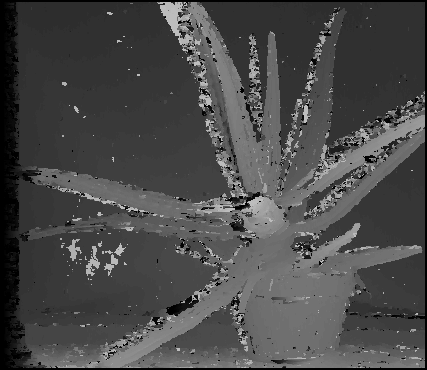

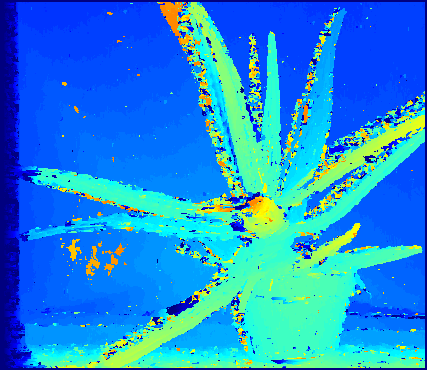

In [ ]:
disparity_range = 64
kernel_size = 5
depth = window_based_matching_l1(
    left_img_path,
    right_img_path,
    disparity_range,
    kernel_size=kernel_size,
    save_result=True
)

cv2_imshow(depth)
cv2_imshow(cv2.applyColorMap(depth,cv2.COLORMAP_JET))